In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

generate data

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

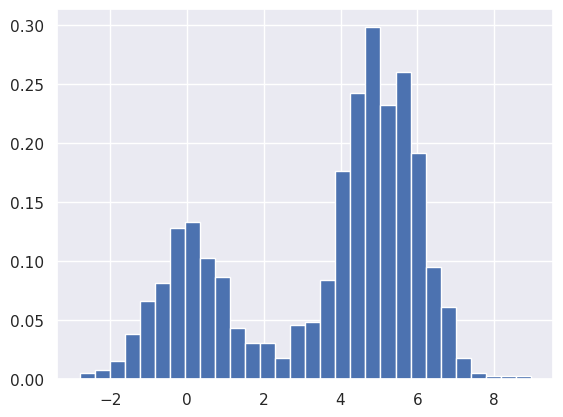

In [3]:

hist = plt.hist(x, bins=30, density=True)


In [10]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
#print(f'{bins}\n\n{bins[1:]} \n-\n {bins[:-1]} \n=\n {widths}')
(density * widths).sum()

1.0

In [11]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

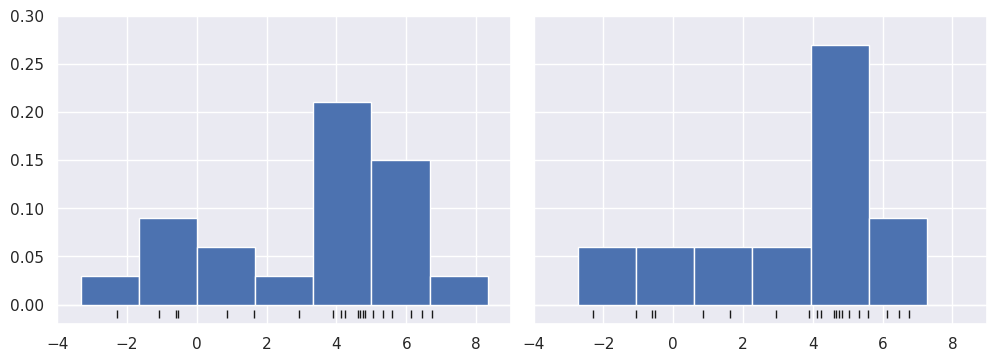

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

(-0.2, 8.0)

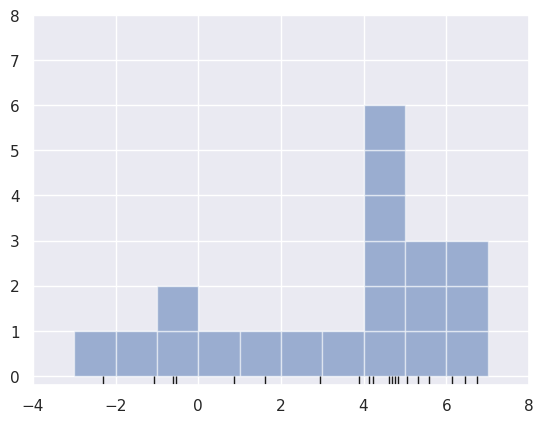

In [14]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
                                   alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

Wyliczana jest gęstość. Oblicza różnicę między punktami osi ox - x_d a daną xi. Sumuje wyniki, czlyli jakby klocki, które są liczone wyżej jakby były z piasku. Kiedy jeden nachodzi na drugi nie całokicie, część drugiego opada niżej, kiedy nie ma nic pod nim.

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  6.74481176  4.2387931   5.3190391   4.75062962  6.46210794  2.93985929
  4.6775828   4.61594565  6.13376944  3.90010873  4.82757179  4.12214158
  5.04221375  5.58281521]


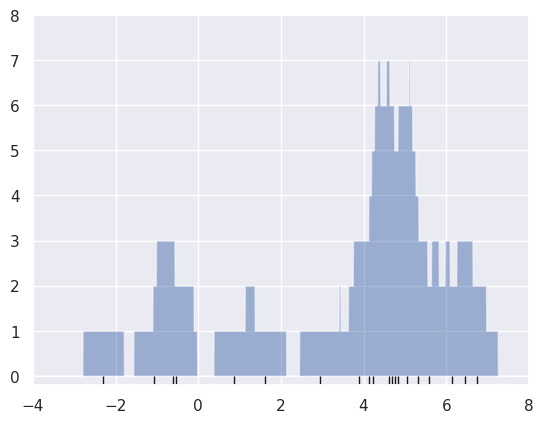

In [20]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

In [23]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Sample 3D data
data_3d = np.array([
    [1.2, 2.5, 0.8],
    [0.5, 1.8, 1.2],
    [2.0, 0.7, 2.5],
    [1.8, 2.3, 3.0],
    [2.5, 1.0, 1.5]
])

print("Data shape:", data_3d.shape)
print("Data array:")
print(data_3d)

# Create a Kernel Density Estimation object
kde_3d = KernelDensity(kernel='gaussian', bandwidth=0.5)

print("Kernel Density Estimation object created.")

# Fit the KDE model to your 3D data
kde_3d.fit(data_3d)

print("KDE fitted.")

# Evaluate the KDE model
log_density_3d = kde_3d.score_samples(data_3d)

print("KDE evaluated.")
print("Log density array:")
print(log_density_3d)

# Sample new data points from the KDE model
n_samples = 100
new_samples_3d = kde_3d.sample(n_samples)

print("New samples generated.")
print("New samples array:")
print(new_samples_3d)

# Visualize the KDE - you need to define min and max values for each dimension
min_x_value = 0.0
max_x_value = 3.0
min_y_value = 0.0
max_y_value = 3.0
min_z_value = 0.0
max_z_value = 3.0
num_points = 50

x_points = np.linspace(min_x_value, max_x_value, num_points)
y_points = np.linspace(min_y_value, max_y_value, num_points)
z_points = np.linspace(min_z_value, max_z_value, num_points)

xv, yv, zv = np.meshgrid(x_points, y_points, z_points, indexing='ij')
points_3d = np.column_stack([xv.ravel(), yv.ravel(), zv.ravel()])

print("Grid points generated.")
print("Points array:")
print(points_3d)

pdf_values_3d = np.exp(kde_3d.score_samples(points_3d))

print("PDF values computed.")
print("PDF values array:")
print(pdf_values_3d)

# Now you can use the pdf_values_3d array for visualization or analysis


Data shape: (5, 3)
Data array:
[[1.2 2.5 0.8]
 [0.5 1.8 1.2]
 [2.  0.7 2.5]
 [1.8 2.3 3. ]
 [2.5 1.  1.5]]
Kernel Density Estimation object created.
KDE fitted.
KDE evaluated.
Log density array:
[-2.18927194 -2.18929748 -2.21733808 -2.28327056 -2.22015853]
New samples generated.
New samples array:
[[ 1.71933721  1.27127879  2.67163456]
 [ 2.16586081  1.27994033  2.2209927 ]
 [ 0.22963692  2.65010482  0.47777957]
 [ 3.30130849  0.34029772  1.23836047]
 [ 0.69613393  1.36292608  0.53180385]
 [ 1.62740996  0.65691894  1.20858078]
 [ 1.0207817   1.83767789  1.28490645]
 [ 1.64746181  2.61146808  0.29133996]
 [ 1.23547753  2.4969672   0.70087301]
 [ 1.90131571  2.07817597  2.75255488]
 [ 1.22373524  2.44069031  2.86437531]
 [ 1.98588512  2.34504759  4.23920524]
 [ 3.1549093   0.47322064  1.53778903]
 [ 1.47590311 -0.04781383  2.72442267]
 [ 0.1883307   1.37261396  1.08784417]
 [ 2.66892415  1.04984643  2.0858335 ]
 [ 2.24766154  1.10374648  2.70227271]
 [ 0.33521041  2.8702157   1.12470194]

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.neighbors import KernelDensity

def estimate_bandwidth(data):
    bw = 10 ** np.linspace(-3, 1, 200)
    grid = GridSearchCV(
        KernelDensity(kernel="gaussian"),
        {"bandwidth": bw},
        cv=LeaveOneOut()
    )
    grid.fit(data)
    best_params = grid.best_params_
    best_bandwidth = best_params['bandwidth']  # Extract the best bandwidth value
    print(best_params)
    return best_bandwidth

# Example data
np_data = np.random.randn(100, 1)  # Example data

best_bandwidth = estimate_bandwidth(np_data)
print("Best Bandwidth:", best_bandwidth)


{'bandwidth': 0.4713753134116724}
Best Bandwidth: 0.4713753134116724
